<a href="https://colab.research.google.com/github/farfaness/Deep_learning_Fast.ia_part1/blob/master/Lesson2b_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem, using Pytorch

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
x = torch.ones(n,2) #rank 2 tensor, with n rows, and 2 colonnes

In [0]:
x[:,0].uniform_(-1.,1) 
# ce sont nos données, les valeurs des features
# la colonne 1 est celle qui sera multipliée aevc l'intercept

# Tiret bas : signifie ne retourne pas les valeurs, modifie l'input
x[:5]

tensor([[ 0.7635,  1.0000],
        [-0.2429,  1.0000],
        [-0.7129,  1.0000],
        [-0.7497,  1.0000],
        [ 0.5800,  1.0000]])

# Les tensors

Un tensor = array of rectangular shape (rectugular or cube shape). Par exemple une image est un tensor 3D : rows * columns * channels (RGB). Avec un tensor on ne parle pas de dimensions mais de rank ou axes. 

- rank = how many axes/dimensions are there? 
- image = rank 3 tensor

In [0]:
a = tensor(3.,2); a 
# on a crée un rank 1 tensor (=vector)
# dans la parenthèse on met les coefficients (a1, a2) : slope, intercept

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)
# x@a : matrice product

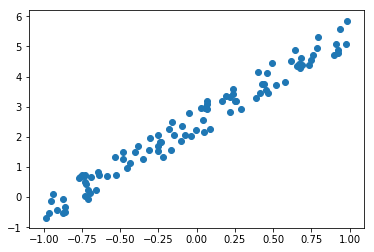

In [0]:
plt.scatter(x[:,0], y);

Imaginons que l'on ne connait pas nos paramètres a1 et a2.

**You** want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

- on utilisera une technique similaire pour déterminer les 50 millions de paramètres de resnet34 pour passer d'une image à une liste de proba pour chaque classes auquelles l'image pourrait appartenir. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

# y_hat : prediction
# y : real value

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1) #paramètre que l'on prédit
# ajoute un . après le 1 pour l'avoir en float

In [0]:
y_hat = x@a #les valeurs de la target que l'on prédit
mse(y_hat, y)

tensor(6.9641)

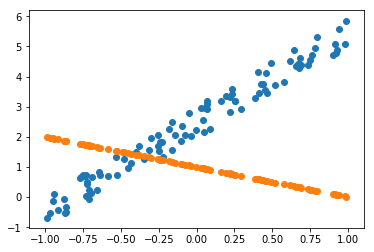

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat); # notre droite de régression

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the **negative direction of the function gradient**.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

Le gradient (ou dérivée de l'équation) est la slope de la courbe. Nous indique dans quel sens aller pour trouver le minimum = négative direction du gradient.

Le gradient est multiplié par le learning rate : pour taille des steps. Plus le learning rate est important, plus les steps seront de taille importante. 

In [0]:
def update():
    y_hat = x@a                  # calcul la prédiction
    loss = mse(y, y_hat)         # calcul la fonction de perte 
    if t % 10 == 0: print(loss)  # imprim loss de temps en temps
    loss.backward()              # calcul la dérivée de la loss function
    with torch.no_grad():        # turn grad calculation off to do the update
        a.sub_(lr * a.grad)      # la dérivée est stockée dans .grad
                                 # ici on fait coeff a - (substract) sa dérivée
                                 # lr est le learning rate, on le multiplie par le gradient
        a.grad.zero_()           # 
        


In [0]:
help(torch.no_grad)

Help on class no_grad in module torch.autograd.grad_mode:

class no_grad(builtins.object)
 |  Context-manager that disabled gradient calculation.
 |  
 |  Disabling gradient calculation is useful for inference, when you are sure
 |  that you will not call :meth:`Tensor.backward()`. It will reduce memory
 |  consumption for computations that would otherwise have `requires_grad=True`.
 |  In this mode, the result of every computation will have
 |  `requires_grad=False`, even when the inputs have `requires_grad=True`.
 |  
 |  Also functions as a decorator.
 |  
 |  
 |  Example::
 |  
 |      >>> x = torch.tensor([1], requires_grad=True)
 |      >>> with torch.no_grad():
 |      ...   y = x * 2
 |      >>> y.requires_grad
 |      False
 |      >>> @torch.no_grad()
 |      ... def doubler(x):
 |      ...     return x * 2
 |      >>> z = doubler(x)
 |      >>> z.requires_grad
 |      False
 |  
 |  Methods defined here:
 |  
 |  __call__(self, func)
 |      Call self as a function.
 |  
 |

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(6.9641, grad_fn=<MeanBackward0>)
tensor(1.4632, grad_fn=<MeanBackward0>)
tensor(0.4408, grad_fn=<MeanBackward0>)
tensor(0.1826, grad_fn=<MeanBackward0>)
tensor(0.1163, grad_fn=<MeanBackward0>)
tensor(0.0992, grad_fn=<MeanBackward0>)
tensor(0.0949, grad_fn=<MeanBackward0>)
tensor(0.0937, grad_fn=<MeanBackward0>)
tensor(0.0935, grad_fn=<MeanBackward0>)
tensor(0.0934, grad_fn=<MeanBackward0>)


on voit une diminution du mse à chaque itération de la descente de gradient

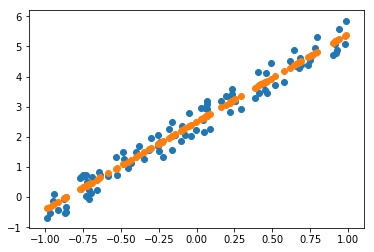

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')  # plot les points
line, = plt.plot(x[:,0], x@a)       # plot la ligne de régression
plt.close()

def animate(i):
    update()                # calcul le nouveau mse à chaque itération de la SGD
    line.set_ydata(x@a)     # update la ligne
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)
# appel une centaine de fois la fonction animate, qui update 

La différence entre Gradient descent et SGD : avec la stochastic on va calculer sur des mini batchs (contrairement à ce que l'on a fait ici où on a travaillé sur toutes nos images).

Concrétement on va prendre de manière random 64 images à chaque itération pour calculer la loss fonction (=mse) et updater nos weights (=paramètres).

## Vocab

- Learning rate
- Epoch : complet run de nos data points
- Minibatch : random bunch of our points used to update our weights
- SGD : gradient descent using mini-batches
- Model / Architecture : mathematical function that we are feedings our weights to
- Parameters : coefficients, weights, numbers that we are updating
- Loss function : how far away/close we are from the right answer ?

For classification problems, (instead of mse) we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

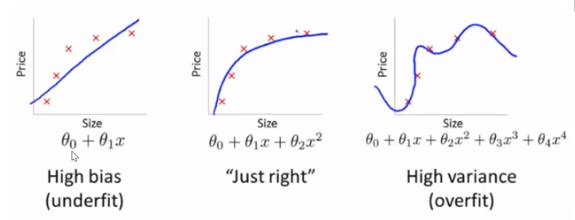

In [0]:
from IPython.display import Image
Image(filename="/content/bias_variance.png")

Pour contrôler l'overfitting, on a pas besoin de s'assurer que l'on a pile poil le bon nombre de paramètres, on peut faire : **de la regularization !!!**

Techniques qui vont s'assurer que lorsque l'on fit nos modèles ils ne vont pas marcher que sur les données qu'ils ont vu mais aussi sur des données inconnues.

Importance du validation set pour évaluer under ou overfitting!!! 

# voir cette ressource : https://www.fast.ai/2017/11/13/validation-sets/